setup
=====

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import sys

In [4]:
sys.path.append("/Users/Spencer/PycharmProjects/PieceRecognizer")

In [5]:
import sampleData

In [6]:
import spencerUtilities

In [7]:
bn = sampleData.smallBn()

our data
=====

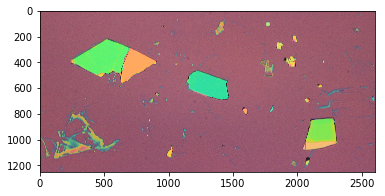

In [8]:
plt.imshow(bn)

It needs to be converted to grayscale before we can apply our simple thresholding method.

In [9]:
bnGray = sampleData.rgb2gray(bn)

***
code example from http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html#sphx-glr-auto-examples-segmentation-plot-label-py, applied to our data
====

The code computes a threshold intensity value that best splits the image into background and foreground. Then, it segments the foreground into regions, labels each region with a different color, and superimposes the result on the original image.


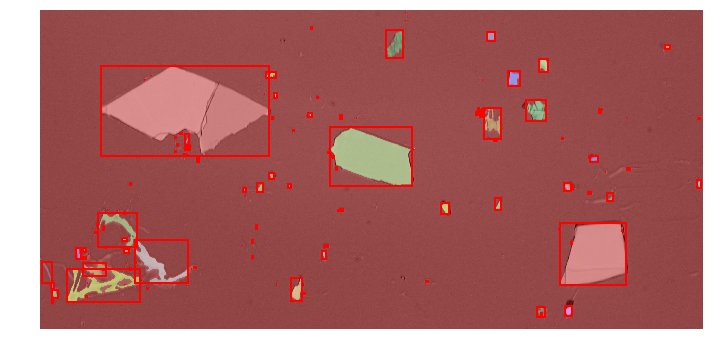

In [10]:
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

image = bnGray
# image = data.coins()[50:-50, 50:-50]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # draw rectangle around segmented coins
    
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

simply removing the candidates with small area removes unwanted small chunks and tape residue
===

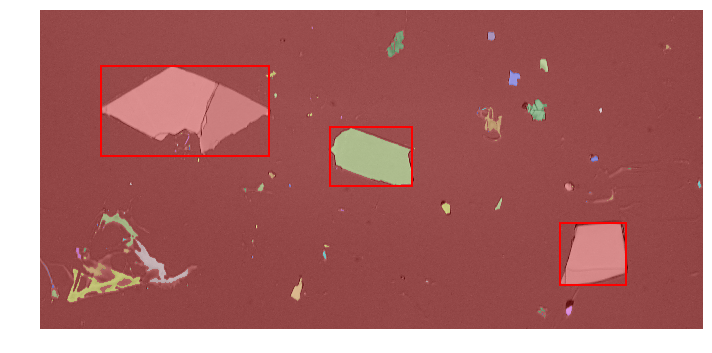

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # draw rectangle around segmented coins
    
    # take regions with large enough areas
    if region.area >= 12000:  # I just hand tuned this value, not robust threshold
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

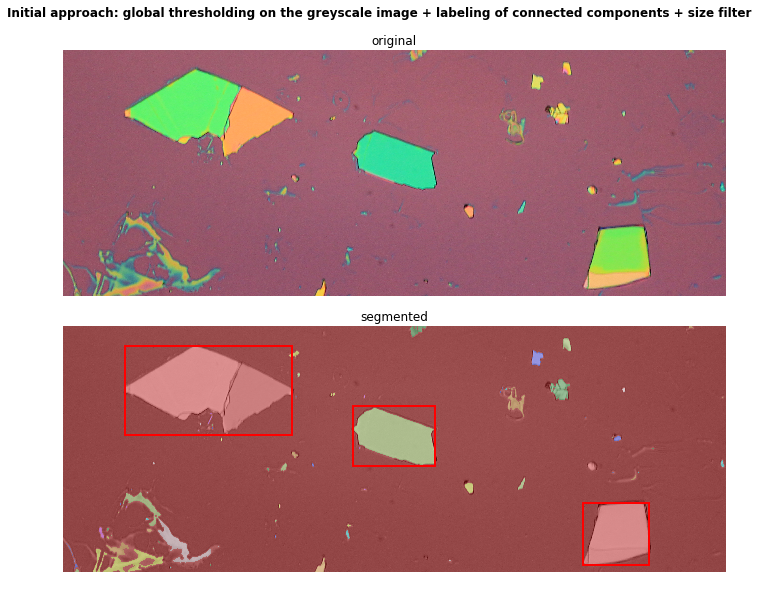

In [34]:
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 8))
ax = axes[1]
bnAx = axes[0]
ax.imshow(image_label_overlay)
bnAx.imshow(bn)

supertitle = fig.suptitle("Initial approach: global thresholding on the greyscale image"
                          +" + labeling of connected components + size filter", 
            fontweight='bold', horizontalalignment='center')
x, y = supertitle.get_position()
supertitle.set_position((x, y + 0.05))
bnAx.set_title("original")
ax.set_title("segmented")

for region in regionprops(label_image):
    # draw rectangle around segmented coins
    
    # take regions with large enough areas
    if region.area >= 12000:  # I just hand tuned this value, not robust threshold
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
bnAx.set_axis_off()
plt.tight_layout()
plt.show()